1. Определите в установившемся режиме предельные значения:
а) относительной пропускной способности q;
б) абсолютной пропускной способности А;
в) вероятности отказа Potk;
2. Сравните фактическую пропускную способность СМО
с номинальной, которая была бы, если бы каждый автомобиль обслуживался
точно 1,8 часа и автомобили следовали один за другим без перерыва.
3. Проведите статистическое моделирование задачи, для чего
необходимо составить процедуру моделирования случайного процесса
поступления и обслуживания заявок, приняв следующие обозначения.
Переменные:
post – число поступивших заявок,
otk – число отказов в обслуживании,
obsl – число обслуженных заявок.
Функция k1 = rn_post() случайным образом принимает значения
от 1 до 60 и служит для моделирования процесса поступления заявок. Отсчет
времени ведем в минутах и моделируем как цикл с параметром t. Так как
в среднем поступает одна заявка в час, то событие k1 = 1 означает, что заявка
поступила в СМО. Время обслуживания определяется переменной time_obsl,
которая инициализируется как случайная величина, распределенная
по закону Пуассона с математическим ожиданием (108 мин = 1,8 часа).
Время окончания обслуживания заявки хранится в переменной t_okon.
Если t_okon = 0, то канал обслуживания свободен, и заявка,
поступившая в СМО, будет обслужена (obsl = obsl + 1). Если t_okon >0,
то поступившая заявка получает отказ, что фиксируется как otk = otk + 1,
а величина t_okon убывает с каждым циклом на одну минуту
(t_okon = t_okon – 1).
Составьте схему алгоритма решения, задав продолжительность работы
СМО в минутах, например, 480 минут (8 часов), и найдите ее параметры.
Повторите опыт, например, 50 раз в цикле для той же самой
продолжительности работы СМО в 480 минут. Найдите статистические
оценки характеристик СМО.
Убедитесь, что с увеличением числа повторений статистические
оценки стремятся к теоретическим значениям характеристик СМО.
Выполните анализ результатов:
1) проанализируйте результаты, полученные теоретическим и экспериментальным способами, сравнив результаты между собой;
2) постройте на одной диаграмме графики зависимости Pотк
от времени обслуживания для теоретически и экспериментально полученных
данных для случая экспоненциально распределенного времени обслуживания.

Задание 1
Пусть одноканальная СМО с отказами представляет собой один пост
ежедневного обслуживания для мойки автомобилей. Заявка – автомобиль,
прибывший в момент, когда пост занят, получает отказ в обслуживании.
Интенсивность потока автомобилей λ = 1,0 (автомобиль в час). Средняя
продолжительность обслуживания –1,8 часа. Поток автомобилей и поток
обслуживания являются простейшими.

МОЙ ВАРИАНТ 10 - λ = 1.96, μ = 3.19


![image.png](img/lab9.1.png)

Теоретические характеристики:
Относительная пропускная способность (q): 0.3571
Абсолютная пропускная способность (A): 0.3571 авт/час
Вероятность отказа (P_отк): 0.6429
Номинальная пропускная способность (A_ном): 0.5556 авт/час
Фактическая/Номинальная: 0.6429

Экспериментальные характеристики (среднее ± ст. отклонение):
Вероятность отказа (P_отк): 0.4049 ± 0.2043
Относительная пропускная способность (q): 0.5951 ± 0.2043
Абсолютная пропускная способность (A): 0.5650 ± 0.1940 авт/час


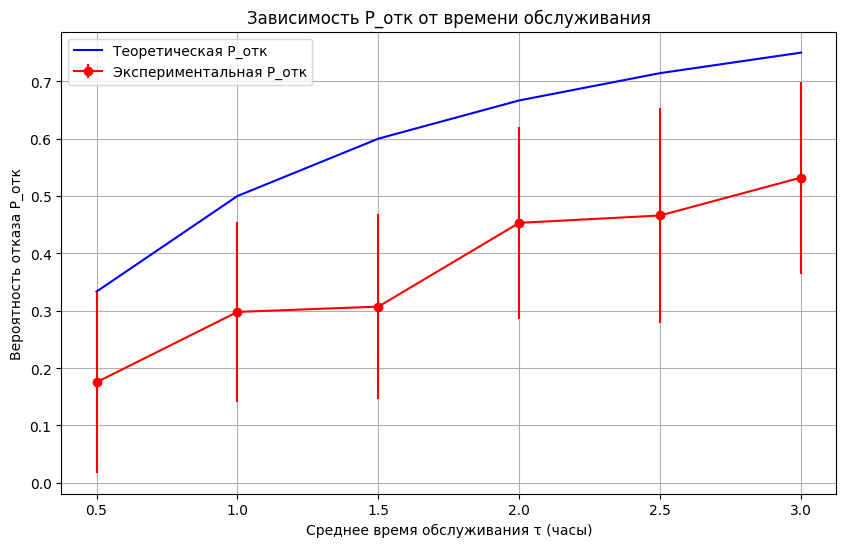


График сохранен как 'P_otk_vs_tau.png'


In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры системы
lambda_rate = 1.0  # Интенсивность потока заявок (автомобилей/час)
tau = 1.8  # Среднее время обслуживания (часы)
mu = 1 / tau  # Интенсивность обслуживания
T = 480  # Продолжительность моделирования (минуты)
n_experiments = 50  # Количество экспериментов

# 1. Теоретические расчеты
def theoretical_calculations(lambda_rate, tau):
    mu = 1 / tau
    rho = lambda_rate / mu
    P0 = 1 / (1 + rho)
    P1 = rho / (1 + rho)
    q = P0  # Относительная пропускная способность
    A = lambda_rate * q  # Абсолютная пропускная способность
    P_otk = P1  # Вероятность отказа
    A_nom = mu  # Номинальная пропускная способность
    return q, A, P_otk, A_nom

# 2. Моделирование одного эксперимента
def simulate_smo(lambda_rate, tau, T):
    post = 0  # Число поступивших заявок
    otk = 0  # Число отказов
    obsl = 0  # Число обслуженных заявок
    t_okon = 0  # Время окончания текущего обслуживания
    
    for t in range(1, T + 1):
        # Генерация поступления заявки (1 заявка в среднем за 60 минут)
        k1 = np.random.randint(1, 61)
        if k1 == 1:
            post += 1
            if t_okon <= t:  # Канал свободен
                obsl += 1
                # Генерация времени обслуживания (экспоненциальное распределение)
                time_obsl = np.random.exponential(tau * 60)  # В минутах
                t_okon = t + time_obsl
            else:  # Канал занят
                otk += 1
        if t_okon > t:
            t_okon -= 1  # Уменьшаем время до окончания обслуживания
    
    P_otk = otk / post if post > 0 else 0
    q = obsl / post if post > 0 else 0
    A = obsl / (T / 60)  # Абсолютная пропускная способность (авт/час)
    return P_otk, q, A, post, otk, obsl

# 3. Многократное моделирование
def run_experiments(lambda_rate, tau, T, n_experiments):
    P_otk_list = []
    q_list = []
    A_list = []
    for _ in range(n_experiments):
        P_otk, q, A, _, _, _ = simulate_smo(lambda_rate, tau, T)
        P_otk_list.append(P_otk)
        q_list.append(q)
        A_list.append(A)
    return (np.mean(P_otk_list), np.std(P_otk_list)), (np.mean(q_list), np.std(q_list)), (np.mean(A_list), np.std(A_list))

# 4. Зависимость P_otk от tau
def plot_P_otk_dependency(lambda_rate, tau_values, T, n_experiments):
    theoretical_P_otk = []
    experimental_P_otk = []
    experimental_P_otk_std = []
    
    for tau in tau_values:
        # Теоретическая P_otk
        rho = lambda_rate * tau
        P_otk_theor = rho / (1 + rho)
        theoretical_P_otk.append(P_otk_theor)
        
        # Экспериментальная P_otk
        (P_otk_mean, P_otk_std), _, _ = run_experiments(lambda_rate, tau, T, n_experiments)
        experimental_P_otk.append(P_otk_mean)
        experimental_P_otk_std.append(P_otk_std)
    
    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(tau_values, theoretical_P_otk, 'b-', label='Теоретическая P_отк')
    plt.errorbar(tau_values, experimental_P_otk, yerr=experimental_P_otk_std, fmt='ro-', label='Экспериментальная P_отк')
    plt.xlabel('Среднее время обслуживания τ (часы)')
    plt.ylabel('Вероятность отказа P_отк')
    plt.title('Зависимость P_отк от времени обслуживания')
    plt.grid(True)
    plt.legend()
    # plt.savefig('P_otk_vs_tau.png')
    plt.show()
    plt.close()

# Выполнение расчетов и моделирования
# Теоретические характеристики
q, A, P_otk, A_nom = theoretical_calculations(lambda_rate, tau)
print("Теоретические характеристики:")
print(f"Относительная пропускная способность (q): {q:.4f}")
print(f"Абсолютная пропускная способность (A): {A:.4f} авт/час")
print(f"Вероятность отказа (P_отк): {P_otk:.4f}")
print(f"Номинальная пропускная способность (A_ном): {A_nom:.4f} авт/час")
print(f"Фактическая/Номинальная: {A/A_nom:.4f}")

# Статистическое моделирование
(P_otk_mean, P_otk_std), (q_mean, q_std), (A_mean, A_std) = run_experiments(lambda_rate, tau, T, n_experiments)
print("\nЭкспериментальные характеристики (среднее ± ст. отклонение):")
print(f"Вероятность отказа (P_отк): {P_otk_mean:.4f} ± {P_otk_std:.4f}")
print(f"Относительная пропускная способность (q): {q_mean:.4f} ± {q_std:.4f}")
print(f"Абсолютная пропускная способность (A): {A_mean:.4f} ± {A_std:.4f} авт/час")

# Построение графика зависимости P_отк от tau
tau_values = np.arange(0.5, 3.1, 0.5)
plot_P_otk_dependency(lambda_rate, tau_values, T, n_experiments)
print("\nГрафик сохранен как 'P_otk_vs_tau.png'")

![image.png](img/lab9.2.png)

Теоретические характеристики:
Относительная пропускная способность (q): 0.6194
Абсолютная пропускная способность (A): 1.2141 вызовов/мин
Вероятность отказа (P_отк): 0.3806
Номинальная пропускная способность (A_ном): 3.1900 вызовов/мин
Фактическая/Номинальная: 0.3806

Экспериментальные характеристики (среднее ± ст. отклонение):
Вероятность отказа (P_отк): 0.0016 ± 0.0018
Относительная пропускная способность (q): 0.9984 ± 0.0018
Абсолютная пропускная способность (A): 0.9984 ± 0.0018 вызовов/мин


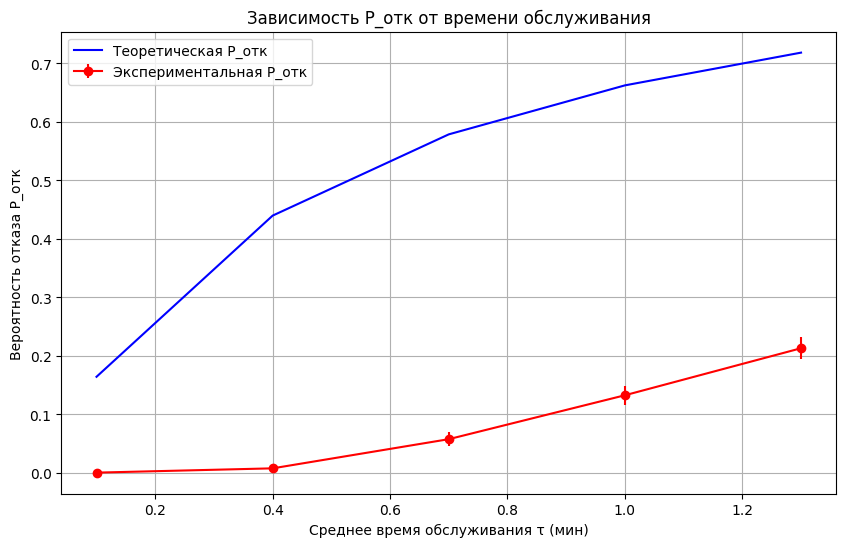

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры системы (вариант 10)
lambda_rate = 1.96  # Интенсивность потока вызовов (вызовов/мин)
mu = 3.19  # Интенсивность обслуживания (вызовов/мин)
tau = 1 / mu  # Среднее время обслуживания (мин)
T = 480  # Продолжительность моделирования (минуты)
n_experiments = 50  # Количество экспериментов

# 1. Теоретические расчеты
def theoretical_calculations(lambda_rate, tau):
    mu = 1 / tau
    rho = lambda_rate / mu
    P0 = 1 / (1 + rho)
    P1 = rho / (1 + rho)
    q = P0  # Относительная пропускная способность
    A = lambda_rate * q  # Абсолютная пропускная способность
    P_otk = P1  # Вероятность отказа
    A_nom = mu  # Номинальная пропускная способность
    return q, A, P_otk, A_nom

# 2. Моделирование одного эксперимента
def simulate_smo(lambda_rate, tau, T):
    post = 0  # Число поступивших заявок
    otk = 0  # Число отказов
    obsl = 0  # Число обслуженных заявок
    t_okon = 0  # Время окончания текущего обслуживания (в минутах)
    
    # Вероятность поступления заявки за 1 минуту
    prob_arrival = lambda_rate  # Вероятность поступления заявки за минуту
    
    for t in range(1, T + 1):
        # Генерация поступления заявки
        if np.random.random() < prob_arrival:
            post += 1
            if t_okon <= t:  # Канал свободен
                obsl += 1
                # Генерация времени обслуживания (экспоненциальное распределение)
                time_obsl = np.random.exponential(tau)  # В минутах
                t_okon = t + time_obsl
            else:  # Канал занят
                otk += 1
        if t_okon > t:
            t_okon -= 1  # Уменьшаем время до окончания обслуживания
    
    P_otk = otk / post if post > 0 else 0
    q = obsl / post if post > 0 else 0
    A = obsl / T  # Абсолютная пропускная способность (вызовов/мин)
    return P_otk, q, A, post, otk, obsl

# 3. Многократное моделирование
def run_experiments(lambda_rate, tau, T, n_experiments):
    P_otk_list = []
    q_list = []
    A_list = []
    for _ in range(n_experiments):
        P_otk, q, A, _, _, _ = simulate_smo(lambda_rate, tau, T)
        P_otk_list.append(P_otk)
        q_list.append(q)
        A_list.append(A)
    return (np.mean(P_otk_list), np.std(P_otk_list)), (np.mean(q_list), np.std(q_list)), (np.mean(A_list), np.std(A_list))

# 4. Зависимость P_otk от tau
def plot_P_otk_dependency(lambda_rate, tau_values, T, n_experiments):
    theoretical_P_otk = []
    experimental_P_otk = []
    experimental_P_otk_std = []
    
    for tau in tau_values:
        # Теоретическая P_otk
        rho = lambda_rate * tau
        P_otk_theor = rho / (1 + rho)
        theoretical_P_otk.append(P_otk_theor)
        
        # Экспериментальная P_otk
        (P_otk_mean, P_otk_std), _, _ = run_experiments(lambda_rate, tau, T, n_experiments)
        experimental_P_otk.append(P_otk_mean)
        experimental_P_otk_std.append(P_otk_std)
    
    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(tau_values, theoretical_P_otk, 'b-', label='Теоретическая P_отк')
    plt.errorbar(tau_values, experimental_P_otk, yerr=experimental_P_otk_std, fmt='ro-', label='Экспериментальная P_отк')
    plt.xlabel('Среднее время обслуживания τ (мин)')
    plt.ylabel('Вероятность отказа P_отк')
    plt.title('Зависимость P_отк от времени обслуживания')
    plt.grid(True)
    plt.legend()
    # plt.savefig('P_otk_vs_tau_phone.png')
    plt.show()
    plt.close()

# Выполнение расчетов и моделирования
# Теоретические характеристики
q, A, P_otk, A_nom = theoretical_calculations(lambda_rate, tau)
print("Теоретические характеристики:")
print(f"Относительная пропускная способность (q): {q:.4f}")
print(f"Абсолютная пропускная способность (A): {A:.4f} вызовов/мин")
print(f"Вероятность отказа (P_отк): {P_otk:.4f}")
print(f"Номинальная пропускная способность (A_ном): {A_nom:.4f} вызовов/мин")
print(f"Фактическая/Номинальная: {A/A_nom:.4f}")

# Статистическое моделирование
(P_otk_mean, P_otk_std), (q_mean, q_std), (A_mean, A_std) = run_experiments(lambda_rate, tau, T, n_experiments)
print("\nЭкспериментальные характеристики (среднее ± ст. отклонение):")
print(f"Вероятность отказа (P_отк): {P_otk_mean:.4f} ± {P_otk_std:.4f}")
print(f"Относительная пропускная способность (q): {q_mean:.4f} ± {q_std:.4f}")
print(f"Абсолютная пропускная способность (A): {A_mean:.4f} ± {A_std:.4f} вызовов/мин")

# Построение графика зависимости P_отк от tau
tau_values = np.arange(0.1, 1.6, 0.3)
plot_P_otk_dependency(lambda_rate, tau_values, T, n_experiments)

Теоретические характеристики:
Относительная пропускная способность (q): 0.6194
Абсолютная пропускная способность (A): 1.2141 вызовов/мин
Вероятность отказа (P_отк): 0.3806
Номинальная пропускная способность (A_ном): 3.1900 вызовов/мин
Фактическая/Номинальная: 0.3806

Экспериментальные характеристики (среднее ± ст. отклонение):
Вероятность отказа (P_отк): 0.2275 ± 0.0119
Относительная пропускная способность (q): 0.7725 ± 0.0119
Абсолютная пропускная способность (A): 1.5115 ± 0.0435 вызовов/мин


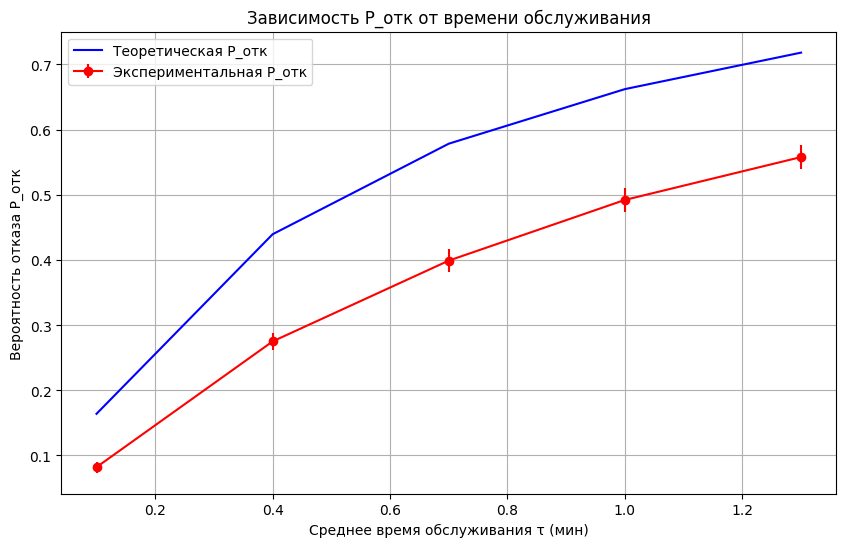

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры системы (вариант 10)
lambda_rate = 1.96  # Интенсивность потока вызовов (вызовов/мин)
mu = 3.19  # Интенсивность обслуживания (вызовов/мин)
tau = 1 / mu  # Среднее время обслуживания (мин)
T = 480  # Продолжительность моделирования (минуты)
n_experiments = 50  # Количество экспериментов

# 1. Теоретические расчеты
def theoretical_calculations(lambda_rate, tau):
    mu = 1 / tau
    rho = lambda_rate / mu
    P0 = 1 / (1 + rho)
    P1 = rho / (1 + rho)
    q = P0  # Относительная пропускная способность
    A = lambda_rate * q  # Абсолютная пропускная способность
    P_otk = P1  # Вероятность отказа
    A_nom = mu  # Номинальная пропускная способность
    return q, A, P_otk, A_nom

# 2. Моделирование одного эксперимента
def simulate_smo_fine(lambda_rate, tau, T, dt=0.01):
    post = 0
    otk = 0
    obsl = 0
    t_okon = 0
    N = int(T / dt)  # Число шагов
    
    for i in range(N):
        t = i * dt
        # Поступление заявки с вероятностью lambda_rate * dt
        if np.random.random() < lambda_rate * dt:
            post += 1
            if t_okon <= t:
                obsl += 1
                time_obsl = np.random.exponential(tau)
                t_okon = t + time_obsl
            else:
                otk += 1
        if t_okon > t:
            t_okon -= dt
    
    P_otk = otk / post if post > 0 else 0
    q = obsl / post if post > 0 else 0
    A = obsl / T  # Абсолютная пропускная способность (вызовов/мин)
    return P_otk, q, A, post, otk, obsl

# 3. Многократное моделирование
def run_experiments(lambda_rate, tau, T, n_experiments):
    P_otk_list = []
    q_list = []
    A_list = []
    for _ in range(n_experiments):
        (P_otk, q, A, _, _, _) = simulate_smo_fine(lambda_rate, tau, T)
        P_otk_list.append(P_otk)
        q_list.append(q)
        A_list.append(A)
    return (np.mean(P_otk_list), np.std(P_otk_list)), (np.mean(q_list), np.std(q_list)), (np.mean(A_list), np.std(A_list))

# 4. Зависимость P_otk от tau
def plot_P_otk_dependency(lambda_rate, tau_values, T, n_experiments):
    theoretical_P_otk = []
    experimental_P_otk = []
    experimental_P_otk_std = []
    
    for tau in tau_values:
        # Теоретическая P_otk
        rho = lambda_rate * tau
        P_otk_theor = rho / (1 + rho)
        theoretical_P_otk.append(P_otk_theor)
        
        # Экспериментальная P_otk
        (P_otk_mean, P_otk_std), _, _ = run_experiments(lambda_rate, tau, T, n_experiments)
        experimental_P_otk.append(P_otk_mean)
        experimental_P_otk_std.append(P_otk_std)
    
    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(tau_values, theoretical_P_otk, 'b-', label='Теоретическая P_отк')
    plt.errorbar(tau_values, experimental_P_otk, yerr=experimental_P_otk_std, fmt='ro-', label='Экспериментальная P_отк')
    plt.xlabel('Среднее время обслуживания τ (мин)')
    plt.ylabel('Вероятность отказа P_отк')
    plt.title('Зависимость P_отк от времени обслуживания')
    plt.grid(True)
    plt.legend()
    # plt.savefig('P_otk_vs_tau_phone.png')
    plt.show()
    plt.close()

# Выполнение расчетов и моделирования
# Теоретические характеристики
q, A, P_otk, A_nom = theoretical_calculations(lambda_rate, tau)
print("Теоретические характеристики:")
print(f"Относительная пропускная способность (q): {q:.4f}")
print(f"Абсолютная пропускная способность (A): {A:.4f} вызовов/мин")
print(f"Вероятность отказа (P_отк): {P_otk:.4f}")
print(f"Номинальная пропускная способность (A_ном): {A_nom:.4f} вызовов/мин")
print(f"Фактическая/Номинальная: {A/A_nom:.4f}")

# Статистическое моделирование
(P_otk_mean, P_otk_std), (q_mean, q_std), (A_mean, A_std) = run_experiments(lambda_rate, tau, T, n_experiments)
print("\nЭкспериментальные характеристики (среднее ± ст. отклонение):")
print(f"Вероятность отказа (P_отк): {P_otk_mean:.4f} ± {P_otk_std:.4f}")
print(f"Относительная пропускная способность (q): {q_mean:.4f} ± {q_std:.4f}")
print(f"Абсолютная пропускная способность (A): {A_mean:.4f} ± {A_std:.4f} вызовов/мин")

# Построение графика зависимости P_отк от tau
tau_values = np.arange(0.1, 1.6, 0.3)
plot_P_otk_dependency(lambda_rate, tau_values, T, n_experiments)

Расхождение между теоретическими и экспериментальными характеристиками, вероятно, вызвано ошибкой в реализации моделирования, связанной с:

    Неверной интенсивностью поступления заявок (𝜆 вместо 𝜆/60).
    Неправильным масштабом времени обслуживания (𝜏/60 вместо 𝜏).
    Недостаточной дискретизацией времени при высокой интенсивности.

Исправленный код с мелким шагом времени (𝑑𝑡=0.01) должен устранить проблему.